In [1]:
from study_ddpg import ddpg
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from agents.DDPG_Agent import DDPG_Agent
import argparse
from copy import deepcopy
from reportPlots import plot_policy_ND
import gym
import gym.spaces
import numpy as np
import pandas as pd
import torch.multiprocessing as mp
import torch as t
from itertools import count
from typing import List
from machin.frame.algorithms import SAC
from machin.utils.logging import default_logger as logger
from torch.nn.functional import softplus
from torch.distributions import Normal
import torch as t
import torch.nn as nn
import gym
import numpy as np
import pandas as pd
from agents.TD3_Agent import DTD3
from utils.random_process import *
from utils.util import *
from utils.memory import Memory, SharedMemory
from study_td3 import *
#USE_CUDA = torch.cuda.is_available()
USE_CUDA = False
if USE_CUDA:
    FloatTensor = torch.cuda.FloatTensor
else:
    FloatTensor = torch.FloatTensor

In [2]:
env = gym.make('Pendulum-v0')
env.seed(2)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
max_action = int(env.action_space.high[0])

In [3]:
def ddpg(n_episodes=1500, max_t=200, print_every=5, state_size=3, action_size = 1):
    scores_deque = deque(maxlen=print_every)
    agent = DDPG_Agent(state_size=state_size, action_size=action_size, random_seed=2)
    scores = []
    for i_episode in range(1, n_episodes + 1):
        state = env.reset()
        agent.reset()
        score = 0
        for _ in range(max_t):
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f} \n '.format(i_episode, np.mean(scores_deque)))
    return agent

In [4]:
%%time
agent_ddpg = ddpg(n_episodes=5,state_size=state_dim,action_size=action_dim)

/home/mohamed/PycharmProjects/SIGAUD_INSPIRED/policies/ddpg_actor.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(state)


Episode 1	Average Score: -1325.87

KeyboardInterrupt: 

In [32]:

# The environment
env = gym.make("Pendulum-v0")
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
max_action = int(env.action_space.high[0])
# replay buffer
memory = Memory(100000, state_dim, action_dim)

# agent
agent = DTD3(state_dim, action_dim, max_action, memory,n_actor=5)
print("starting")
train(agent,n_episodes=10,max_steps=25000,debug=True,n_eval=5,n_actor=1,training_per_agent=1000,animate=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

starting
noisy RL agent fitness:-1285.439623470094


  0%|          | 0/1000 [00:00<?, ?it/s]

Iteration#0: Total steps:1000 

noisy RL agent fitness:-1088.1044881498847


  0%|          | 0/1000 [00:00<?, ?it/s]

Iteration#0: Total steps:2000 

noisy RL agent fitness:-975.4811243042006


  0%|          | 0/1000 [00:00<?, ?it/s]

Iteration#0: Total steps:3000 

noisy RL agent fitness:-1133.1426583210134


  0%|          | 0/1000 [00:00<?, ?it/s]

Iteration#0: Total steps:4000 

noisy RL agent fitness:-1158.827767921605


  0%|          | 0/1000 [00:00<?, ?it/s]

RL agent fitness:-754.126198224532
Iteration#1: Total steps:5000 

noisy RL agent fitness:-1147.973736698106


  0%|          | 0/1000 [00:00<?, ?it/s]

Iteration#1: Total steps:6000 

noisy RL agent fitness:-1184.84409762078


  0%|          | 0/1000 [00:00<?, ?it/s]

Iteration#1: Total steps:7000 

noisy RL agent fitness:-1322.88941694247


  0%|          | 0/1000 [00:00<?, ?it/s]

Iteration#1: Total steps:8000 

noisy RL agent fitness:-1152.099368668129


  0%|          | 0/1000 [00:00<?, ?it/s]

Iteration#1: Total steps:9000 

noisy RL agent fitness:-1166.8106065801283


100%|██████████| 1000/1000 [00:42<00:00, 23.32it/s]


RL agent fitness:-221.09032434369655
Iteration#2: Total steps:10000 



  0%|          | 3/1000 [00:00<00:43, 22.72it/s]

noisy RL agent fitness:-126.26829025449452


100%|██████████| 1000/1000 [00:44<00:00, 22.41it/s]


Iteration#2: Total steps:11000 



  0%|          | 3/1000 [00:00<00:46, 21.60it/s]

noisy RL agent fitness:-169.04494023484835


100%|██████████| 1000/1000 [00:43<00:00, 22.89it/s]


Iteration#2: Total steps:12000 



  0%|          | 2/1000 [00:00<00:55, 17.85it/s]

noisy RL agent fitness:-123.44231018323728


100%|██████████| 1000/1000 [00:40<00:00, 24.52it/s]


Iteration#2: Total steps:13000 



  0%|          | 3/1000 [00:00<00:38, 25.84it/s]

noisy RL agent fitness:-163.12443143444807


100%|██████████| 1000/1000 [00:40<00:00, 24.77it/s]


Iteration#2: Total steps:14000 



  0%|          | 3/1000 [00:00<00:40, 24.63it/s]

noisy RL agent fitness:-144.2212823347026


100%|██████████| 1000/1000 [00:42<00:00, 23.75it/s]


RL agent fitness:-96.00871474979739
Iteration#3: Total steps:15000 



  0%|          | 3/1000 [00:00<00:43, 23.12it/s]

noisy RL agent fitness:-142.09378652461461


100%|██████████| 1000/1000 [00:43<00:00, 22.85it/s]


Iteration#3: Total steps:16000 



  0%|          | 3/1000 [00:00<00:43, 22.92it/s]

noisy RL agent fitness:-120.62884484138246


100%|██████████| 1000/1000 [00:45<00:00, 21.91it/s]


Iteration#3: Total steps:17000 



  0%|          | 3/1000 [00:00<00:46, 21.54it/s]

noisy RL agent fitness:-120.04198950521422


100%|██████████| 1000/1000 [00:47<00:00, 21.07it/s]


Iteration#3: Total steps:18000 



  0%|          | 3/1000 [00:00<00:47, 20.81it/s]

noisy RL agent fitness:-160.51985720284716


100%|██████████| 1000/1000 [00:52<00:00, 19.01it/s]


Iteration#3: Total steps:19000 



  0%|          | 3/1000 [00:00<00:49, 19.95it/s]

noisy RL agent fitness:-214.2616871760676


100%|██████████| 1000/1000 [00:51<00:00, 19.25it/s]


RL agent fitness:-239.81780479318618
Iteration#4: Total steps:20000 



  0%|          | 2/1000 [00:00<00:50, 19.63it/s]

noisy RL agent fitness:-119.31360156346932


100%|██████████| 1000/1000 [00:54<00:00, 18.27it/s]


Iteration#4: Total steps:21000 



  0%|          | 2/1000 [00:00<00:54, 18.24it/s]

noisy RL agent fitness:-97.09018431967549


100%|██████████| 1000/1000 [00:55<00:00, 18.03it/s]


Iteration#4: Total steps:22000 



  0%|          | 2/1000 [00:00<00:55, 17.97it/s]

noisy RL agent fitness:-375.268477836161


100%|██████████| 1000/1000 [01:00<00:00, 16.59it/s]


Iteration#4: Total steps:23000 



  0%|          | 2/1000 [00:00<01:05, 15.35it/s]

noisy RL agent fitness:-183.86545758129478


100%|██████████| 1000/1000 [00:58<00:00, 17.19it/s]


Iteration#4: Total steps:24000 



  0%|          | 2/1000 [00:00<00:57, 17.33it/s]

noisy RL agent fitness:-141.94296402625142


100%|██████████| 1000/1000 [01:07<00:00, 14.74it/s]


RL agent fitness:-197.06350267021264
Iteration#5: Total steps:25000 



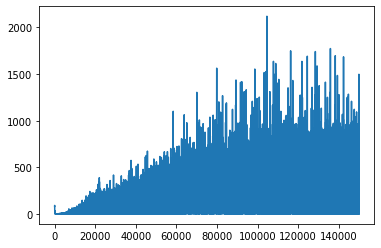

In [47]:
D = agent.stats
del D["heatmap"]
df = pd.DataFrame(agent.stats)
df = df.loc[df['actor'] == 0]
plt.plot(np.arange(df["critic_loss"].shape[0]),df["critic_loss"])

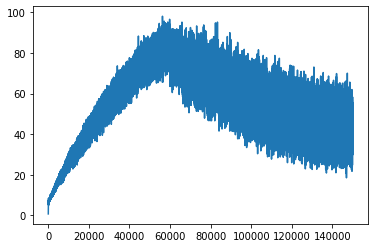

In [48]:
df = df.loc[df['actor'] == 0]
plt.plot(np.arange(df["actor_loss"].shape[0]),df["actor_loss"])

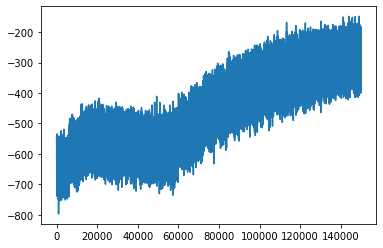

In [49]:
df = df.loc[df['actor'] == 0]
plt.plot(np.arange(df["reward_sum"].shape[0]),df["reward_sum"])

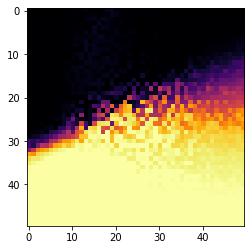

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
arr = np.array(agent.stats["heatmap"])
fig = plt.figure()
i=0
im = plt.imshow(arr[0], animated=True , cmap="inferno")
def updatefig(*args):
    global i
    if (i<24):
        i += 1
    else:
        i=0
    im.set_array(arr[i])
    return im,
ani = animation.FuncAnimation(fig, updatefig,  blit=True)
from IPython.display import HTML
HTML(ani.to_jshtml())

In [42]:
arr = np.array(agent.stats["heatmap"])
print(arr.shape)

(25, 50, 50)


In [44]:
from machin.frame.algorithms import SAC
from machin.utils.logging import default_logger as logger
import torch.nn as nn
env = gym.make("Pendulum-v0")
observe_dim = 3
action_dim = 1
action_range = 2
max_episodes = 500
max_steps = 200
noise_param = (0, 0.2)
noise_mode = "normal"
solved_reward = -140
solved_repeat = 3

In [34]:

# model definition
class Actor(nn.Module):
    def __init__(self, state_dim, action_dim, action_range):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(state_dim, 320)
        self.fc1 = nn.Linear(state_dim, 320)
        self.fc2 = nn.Linear(320, 640)
        self.mu_head = nn.Linear(640, action_dim)
        self.sigma_head = nn.Linear(640, action_dim)
        self.action_range = action_range

    @torch.jit.unused
    def forward(self, state, action=None):
        a = t.relu(self.fc1(state))
        a = t.relu(self.fc2(a))
        mu = self.mu_head(a)
        sigma = softplus(self.sigma_head(a))
        dist = Normal(mu, sigma)
        act = (atanh(action / self.action_range)
               if action is not None
               else dist.rsample())
        act_entropy = dist.entropy()
        # the suggested way to confine your actions within a valid range
        # is not clamping, but remapping the distribution
        act_log_prob = dist.log_prob(act)
        act_tanh = t.tanh(act)
        act = act_tanh * self.action_range
        # the distribution remapping process used in the original essay.
        act_log_prob -= t.log(self.action_range *
                              (1 - act_tanh.pow(2)) +
                              1e-6)
        act_log_prob = act_log_prob.sum(1, keepdim=True)
        return act, act_log_prob, act_entropy

    @torch.jit.export
    def select_action(self, state: List[float], deterministic: bool=False) -> List[float]:
        """
        Compute an action or vector of actions given a state or vector of states
        :param state: the input state(s)
        :param deterministic: whether the policy should be considered deterministic or not
        :return: the resulting action(s)
        """
        state = torch.tensor(state)
        action = self.forward(state)
        #action = np.clip(action,-1,1)
        act: List[float] = action[0].data.tolist()
        return act

class Critic(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(Critic, self).__init__()

        self.fc1 = nn.Linear(state_dim + action_dim, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 1)

    def forward(self, state, action):
        state_action = t.cat([state, action], 1)
        q = t.relu(self.fc1(state_action))
        q = t.relu(self.fc2(q))
        q = self.fc3(q)
        return q

In [42]:
actor = Actor(observe_dim, action_dim, action_range)
critic = Critic(observe_dim, action_dim)
critic_t = Critic(observe_dim, action_dim)
critic2 = Critic(observe_dim, action_dim)
critic2_t = Critic(observe_dim, action_dim)

sac = SAC(actor, critic, critic_t, critic2, critic2_t,
          t.optim.Adam,
          nn.MSELoss(reduction='sum'),visualize=True)

episode, step, reward_fulfilled = 0, 0, 0
smoothed_total_reward = 0
D = {
}
while episode < max_episodes:
    episode += 1
    total_reward = 0
    terminal = False
    step = 0
    state = t.tensor(env.reset(), dtype=t.float32).view(1, observe_dim)

    while not terminal and step <= max_steps:
        step += 1
        with t.no_grad():
            old_state = state
            # agent model inference
            action = sac.act({"state": old_state})[0]
            state, reward, terminal, _ = env.step(action.numpy())
            state = t.tensor(state, dtype=t.float32).view(1, observe_dim)
            total_reward += reward[0]
            sac.store_transition({
                "state": {"state": old_state},
                "action": {"action": action},
                "next_state": {"state": state},
                "reward": reward[0],
                "terminal": terminal or step == max_steps
            })

    # update, update more if episode is longer, else less
    if episode > 100:
        for _ in range(step):
            actor_loss, critic_loss = sac.update()
            D["actor_loss"] = D.get("actor_loss",[]) + [-actor_loss]
            D["critic_loss"] = D.get("critic_loss",[]) + [-critic_loss]
        logger.info("Episode {} actor loss={:.2f} critic loss={:.2f} ".format(episode, actor_loss,critic_loss))
    # show reward
    smoothed_total_reward = (smoothed_total_reward * 0.9 +
                             total_reward * 0.1)
    logger.info("Episode {} total reward={:.2f}"
                .format(episode, smoothed_total_reward))
    if smoothed_total_reward > solved_reward and episode > 100:
        reward_fulfilled = reward_fulfilled + 1
        if reward_fulfilled >= solved_repeat:
            logger.info("Environment solved!")
            break
    else:
        reward_fulfilled = 0

[2020-11-25 09:20:19,364] <WARNING>:default_logger:You have not specified the i/o device of your model <class '__main__.Actor'>, automatically determined and set to: cpu
The framework is not responsible for any un-matching device issues caused by this operation.
[2020-11-25 09:20:19,478] <INFO>:default_logger:Episode 1 total reward=-117.57
[2020-11-25 09:20:19,590] <INFO>:default_logger:Episode 2 total reward=-197.36
[2020-11-25 09:20:19,702] <INFO>:default_logger:Episode 3 total reward=-284.11
[2020-11-25 09:20:19,819] <INFO>:default_logger:Episode 4 total reward=-417.00
[2020-11-25 09:20:19,933] <INFO>:default_logger:Episode 5 total reward=-464.25
[2020-11-25 09:20:20,045] <INFO>:default_logger:Episode 6 total reward=-546.68
[2020-11-25 09:20:20,157] <INFO>:default_logger:Episode 7 total reward=-602.24
[2020-11-25 09:20:20,270] <INFO>:default_logger:Episode 8 total reward=-638.56
[2020-11-25 09:20:20,393] <INFO>:default_logger:Episode 9 total reward=-682.23
[2020-11-25 09:20:20,508] 

[2020-11-25 09:20:31,226] <INFO>:default_logger:Episode 90 total reward=-1207.94
[2020-11-25 09:20:31,344] <INFO>:default_logger:Episode 91 total reward=-1265.54
[2020-11-25 09:20:31,494] <INFO>:default_logger:Episode 92 total reward=-1220.70
[2020-11-25 09:20:31,649] <INFO>:default_logger:Episode 93 total reward=-1175.65
[2020-11-25 09:20:31,783] <INFO>:default_logger:Episode 94 total reward=-1217.73
[2020-11-25 09:20:31,929] <INFO>:default_logger:Episode 95 total reward=-1204.65
[2020-11-25 09:20:32,082] <INFO>:default_logger:Episode 96 total reward=-1174.24
[2020-11-25 09:20:32,193] <INFO>:default_logger:Episode 97 total reward=-1142.06
[2020-11-25 09:20:32,310] <INFO>:default_logger:Episode 98 total reward=-1158.42
[2020-11-25 09:20:32,422] <INFO>:default_logger:Episode 99 total reward=-1209.78
[2020-11-25 09:20:32,531] <INFO>:default_logger:Episode 100 total reward=-1189.05
[2020-11-25 09:20:32,655] <WARNING>:default_logger:You have not specified the i/o device of your model <clas

[2020-11-25 09:21:18,519] <INFO>:default_logger:Episode 132 actor loss=-114.31 critic loss=8161.42 
[2020-11-25 09:21:18,519] <INFO>:default_logger:Episode 132 total reward=-879.63
[2020-11-25 09:21:19,729] <INFO>:default_logger:Episode 133 actor loss=-116.11 critic loss=14639.99 
[2020-11-25 09:21:19,729] <INFO>:default_logger:Episode 133 total reward=-829.63
[2020-11-25 09:21:21,015] <INFO>:default_logger:Episode 134 actor loss=-118.53 critic loss=1128.00 
[2020-11-25 09:21:21,015] <INFO>:default_logger:Episode 134 total reward=-783.91
[2020-11-25 09:21:22,322] <INFO>:default_logger:Episode 135 actor loss=-119.25 critic loss=40578.01 
[2020-11-25 09:21:22,323] <INFO>:default_logger:Episode 135 total reward=-742.60
[2020-11-25 09:21:23,802] <INFO>:default_logger:Episode 136 actor loss=-122.34 critic loss=28167.55 
[2020-11-25 09:21:23,803] <INFO>:default_logger:Episode 136 total reward=-681.13
[2020-11-25 09:21:25,096] <INFO>:default_logger:Episode 137 actor loss=-126.72 critic loss=1

[2020-11-25 09:22:10,696] <INFO>:default_logger:Episode 173 total reward=-195.08
[2020-11-25 09:22:12,015] <INFO>:default_logger:Episode 174 actor loss=-158.95 critic loss=2403.09 
[2020-11-25 09:22:12,015] <INFO>:default_logger:Episode 174 total reward=-199.72
[2020-11-25 09:22:13,586] <INFO>:default_logger:Episode 175 actor loss=-154.33 critic loss=3394.66 
[2020-11-25 09:22:13,587] <INFO>:default_logger:Episode 175 total reward=-192.32
[2020-11-25 09:22:14,887] <INFO>:default_logger:Episode 176 actor loss=-165.14 critic loss=2819.71 
[2020-11-25 09:22:14,888] <INFO>:default_logger:Episode 176 total reward=-197.02
[2020-11-25 09:22:16,219] <INFO>:default_logger:Episode 177 actor loss=-158.44 critic loss=2173.98 
[2020-11-25 09:22:16,219] <INFO>:default_logger:Episode 177 total reward=-201.25
[2020-11-25 09:22:17,513] <INFO>:default_logger:Episode 178 actor loss=-158.32 critic loss=3842.35 
[2020-11-25 09:22:17,513] <INFO>:default_logger:Episode 178 total reward=-193.14
[2020-11-25 09

[2020-11-25 09:23:12,010] <INFO>:default_logger:Episode 215 actor loss=-117.31 critic loss=4766.81 
[2020-11-25 09:23:12,011] <INFO>:default_logger:Episode 215 total reward=-169.00
[2020-11-25 09:23:13,463] <INFO>:default_logger:Episode 216 actor loss=-143.12 critic loss=3769.08 
[2020-11-25 09:23:13,464] <INFO>:default_logger:Episode 216 total reward=-187.15
[2020-11-25 09:23:14,974] <INFO>:default_logger:Episode 217 actor loss=-102.25 critic loss=4419.88 
[2020-11-25 09:23:14,975] <INFO>:default_logger:Episode 217 total reward=-180.55
[2020-11-25 09:23:16,430] <INFO>:default_logger:Episode 218 actor loss=-125.44 critic loss=4032.86 
[2020-11-25 09:23:16,430] <INFO>:default_logger:Episode 218 total reward=-187.92
[2020-11-25 09:23:17,843] <INFO>:default_logger:Episode 219 actor loss=-131.24 critic loss=62473.60 
[2020-11-25 09:23:17,844] <INFO>:default_logger:Episode 219 total reward=-181.01
[2020-11-25 09:23:19,235] <INFO>:default_logger:Episode 220 actor loss=-106.86 critic loss=810

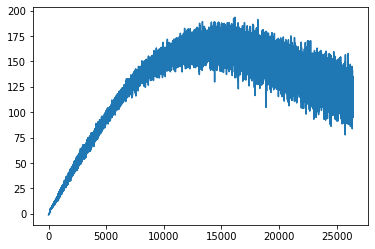

In [43]:
plt.plot(range(len(D["actor_loss"])),D["actor_loss"])